In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)


In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)


# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index.copy()


# Set the coin_id column as index
df_market_data_scaled.index = crypto_names


# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [8]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


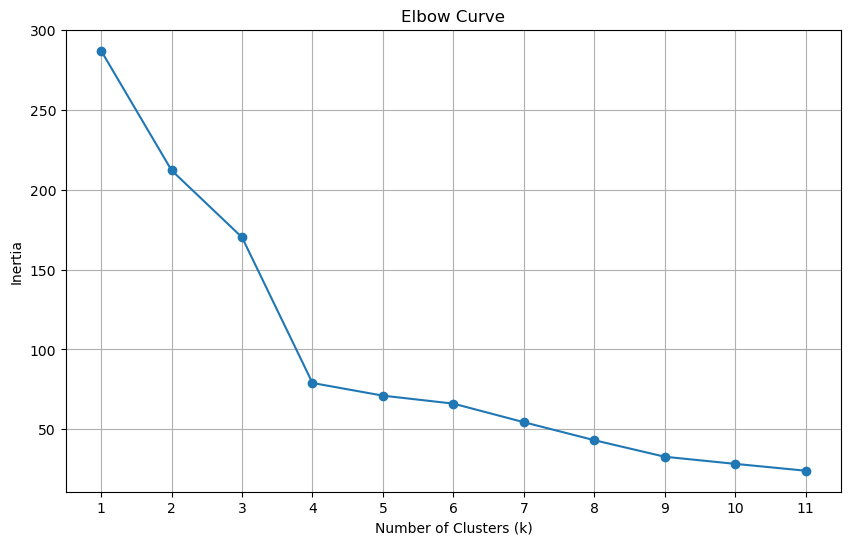

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for k is 4 based on the Elbow curve analysis of the original data. This value shows a noticeable decrease in inertia, indicating a good balance between cluster compactness and model complexity.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)


In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans.fit_predict(df_market_data_scaled)


# Print the resulting array of cluster values.
cluster_labels

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [14]:
# Create a copy of the scaled DataFrame
scaled_df_with_clusters = df_market_data_scaled.copy()


In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_with_clusters['cluster'] = cluster_labels


# Display the copy of the scaled DataFrame
scaled_df_with_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting
scatter_plot = scaled_df_with_clusters.hvplot.scatter(

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
# Color the graph points with the labels found using K-Means and
        by='cluster',

# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
    hover_cols=['coin_id'],
width=800,
    height=400
)
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)


# View the scaled PCA data
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is approximately 0.895 (or 89.5%), indicating that these three components capture about 89.5% of the total variance in the dataset.

In [20]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)


# Copy the crypto names from the original scaled DataFrame
df_market_data_pca['coin_id'] = df_market_data.index


# Set the coin_id column as index
df_market_data_pca.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
df_market_data_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
pca_k_values = list(range(1, 12))


In [22]:
# Create an empty list to store the inertia values
pca_inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in pca_k_values:

# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_market_data_pca[['PC1', 'PC2', 'PC3']])

# 3. Append the model.inertia_ to the inertia list
    pca_inertia.append(kmeans.inertia_)

In [23]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {'k': pca_k_values, 'inertia': pca_inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)


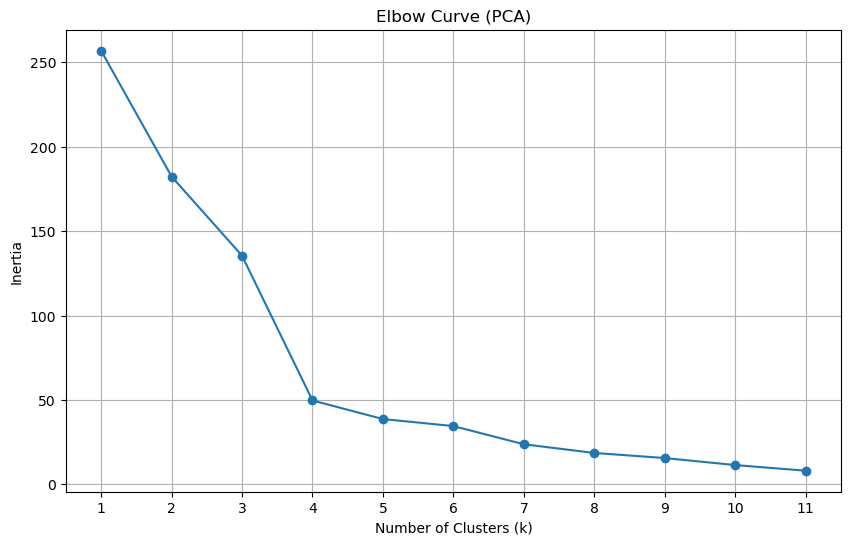

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(pca_elbow_df['k'], pca_elbow_df['inertia'], marker='o')
plt.title('Elbow Curve (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(pca_k_values)
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 3. This was determined from the Elbow curve where the inertia shows a noticeable change in its slope, indicating that adding more clusters beyond this point does not significantly improve the model.
    

 * **Question:** Does it differ from the best k value found using the original data?

   * **Answer:** Yes, it differs. The best k value for the original data is 4, while the best k value for the PCA data is 3. This indicates that the dimensionality reduction through PCA led to a different optimal clustering configuration.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=1)


In [26]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_data_pca[['PC1', 'PC2', 'PC3']])


KMeans(n_clusters=3, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans.predict(df_market_data_pca[['PC1', 'PC2', 'PC3']])


# Print the resulting array of cluster values.
pca_cluster_labels


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [28]:
# Create a copy of the scaled PCA DataFrame

scaled_pca_df_with_clusters = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

scaled_pca_df_with_clusters['cluster'] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame
scaled_pca_df_with_clusters.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
# Create a scatter plot using hvPlot by setting
pca_scatter_plot = scaled_pca_df_with_clusters.hvplot.scatter(

# `x="PC1"` and `y="PC2"`.
    x='PC1',
    y='PC2',
# Color the graph points with the labels found using K-Means and
    by='cluster',

# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
    width=800,
    height=400
)
pca_scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

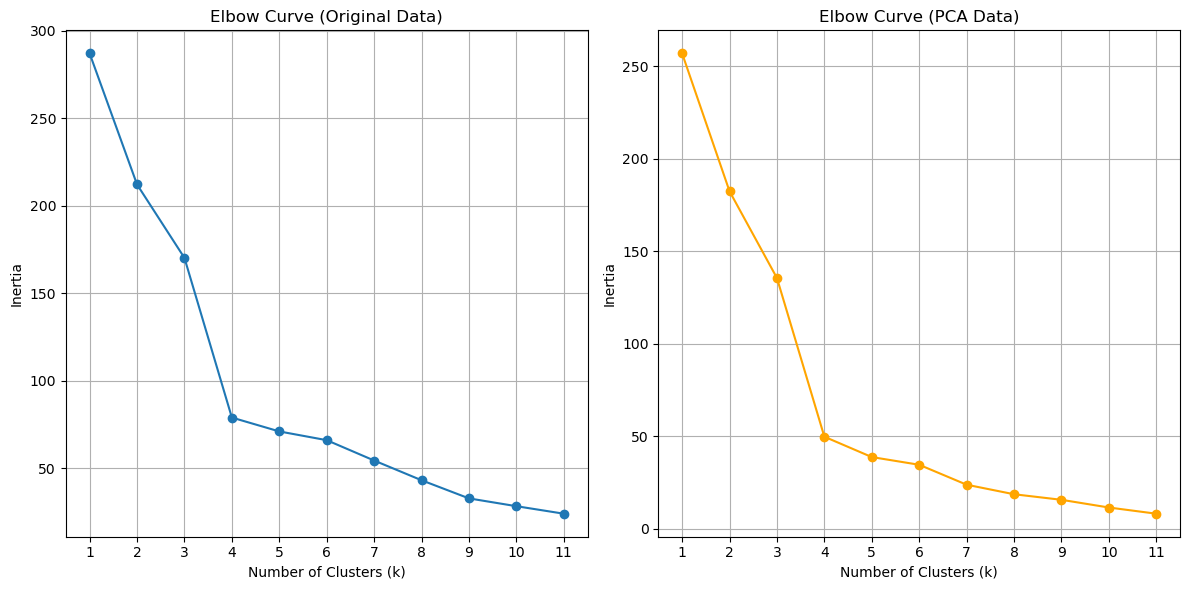

In [30]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Original data Elbow curve
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

# PCA data Elbow curve
plt.subplot(1, 2, 2)
plt.plot(pca_k_values, pca_inertia, marker='o', color='orange')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(pca_k_values)
plt.grid()

plt.tight_layout()

plt.show()

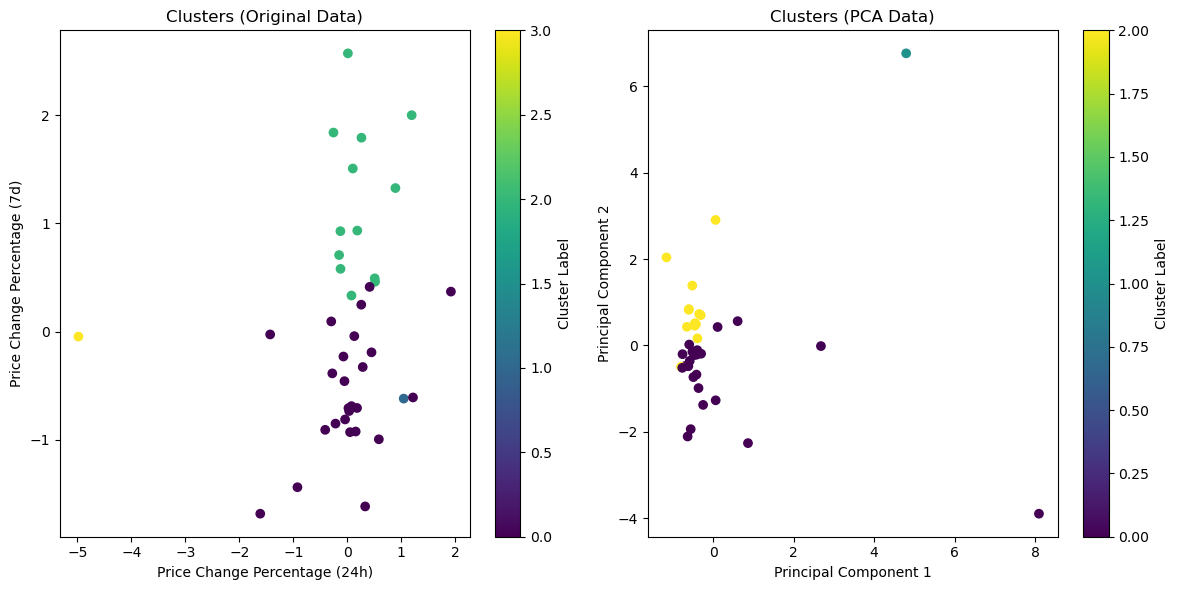

In [31]:
# Composite plot to contrast the clusters
plt.figure(figsize=(12, 6))

# Original data cluster scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df_market_data_scaled['price_change_percentage_24h'], df_market_data_scaled['price_change_percentage_7d'], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Clusters (Original Data)')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.colorbar(label='Cluster Label')

# Scatter plot for PCA data clusters
plt.subplot(1, 2, 2)
plt.scatter(df_market_data_pca['PC1'], df_market_data_pca['PC2'], c=pca_cluster_labels, cmap='viridis', marker='o')
plt.title('Clusters (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()

plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data with K-Means can lead to simpler models with reduced computational complexity. In this analysis:

    * The PCA data demonstrates that significant variance is retained with fewer dimensions (3 principal components), effectively reducing   noise and irrelevant features.
    * The original data clusters reveal more complex relationships, indicated by higher inertia values with more clusters.
    * While simplifying the model and improving computational speed, using fewer features may also result in a loss of detail and nuanced relationships within the data.